In [18]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [19]:
data =pd.read_csv(r'C:\Users\anshr\Downloads\diabetes (1).csv')

In [20]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [14]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
data['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [16]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [17]:
# now  we have to  explore our 

ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

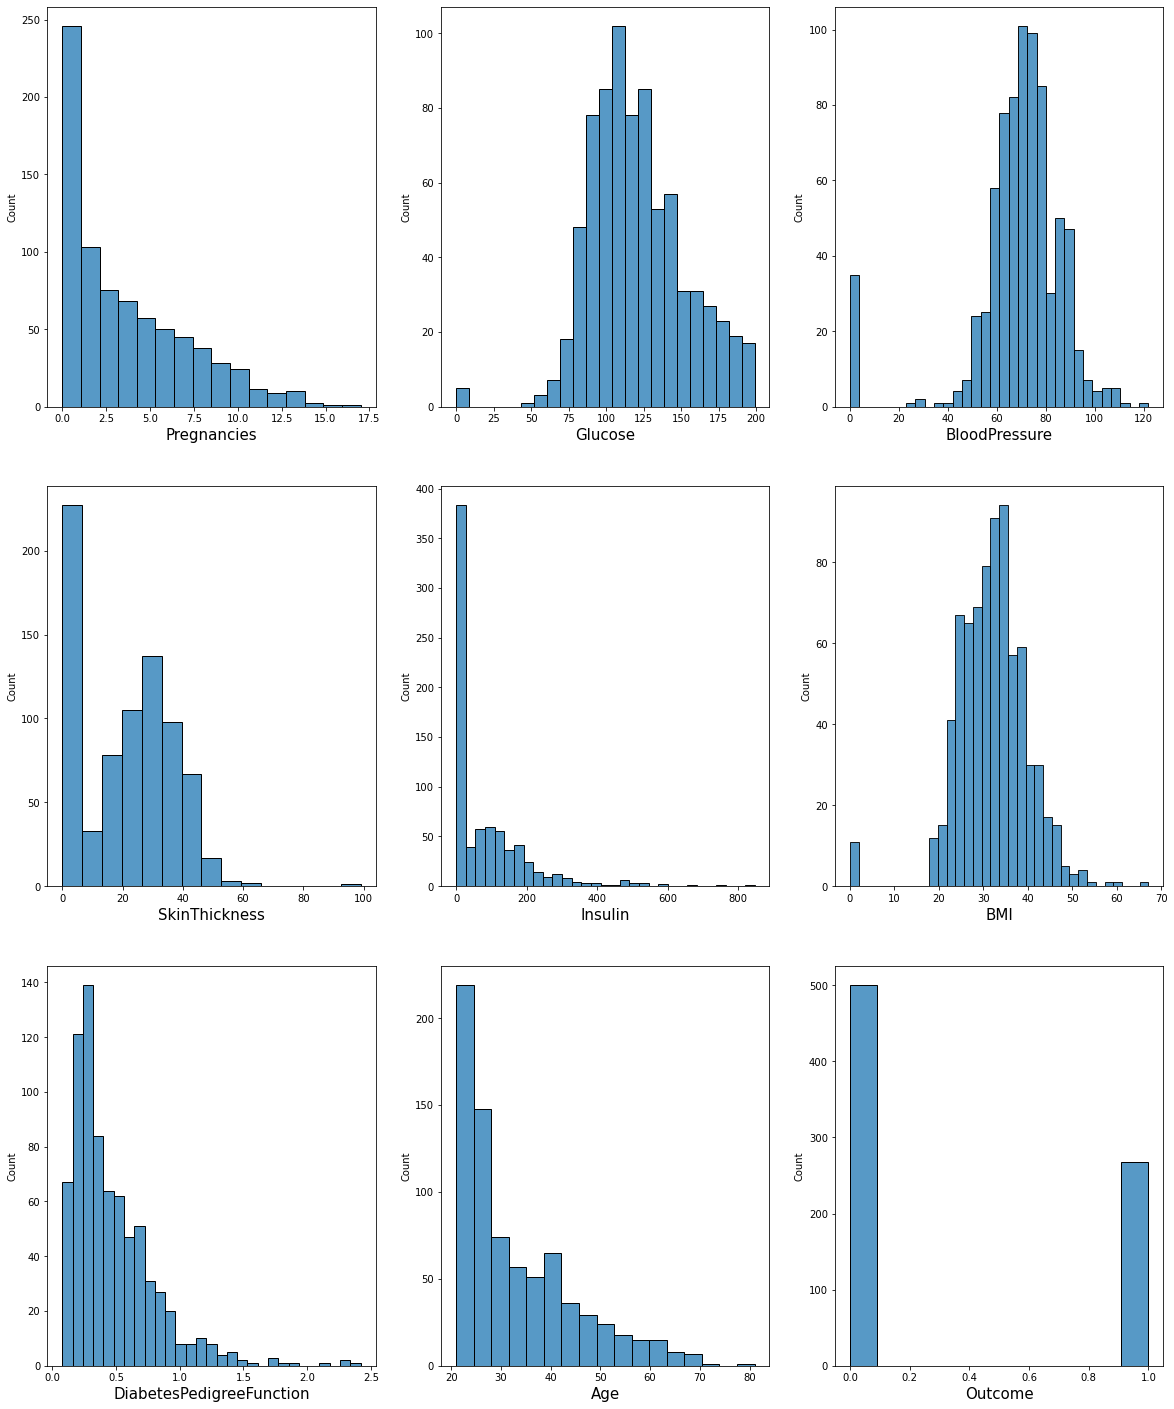

In [37]:

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

<AxesSubplot:ylabel='Density'>

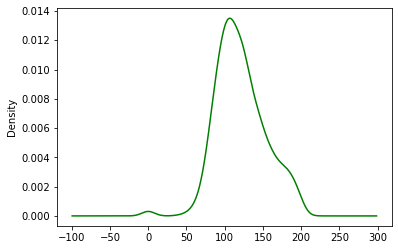

In [38]:
data.Glucose.plot.density(color='green')

# now we have  observed that  that we have some skewness in the columns and they are not following the normal distribution 


In [25]:
# now we  have too remove some of the non acceptable value from the columns of the data frame 
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [39]:

# 0 is  error 
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())



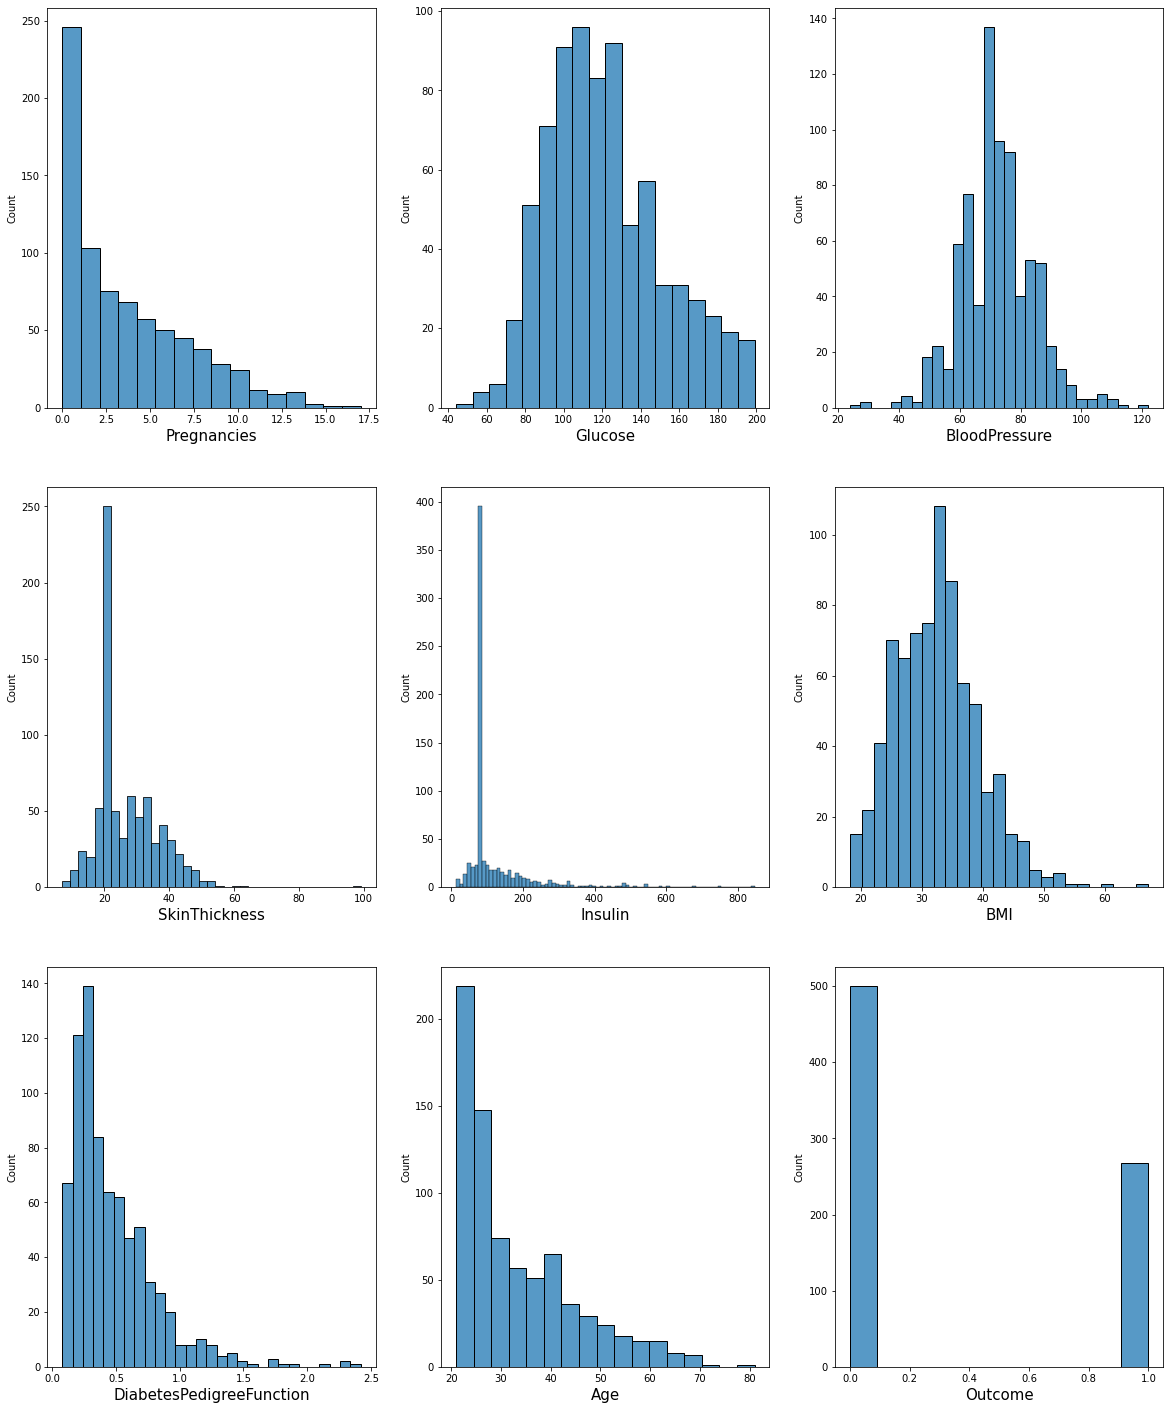

In [27]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

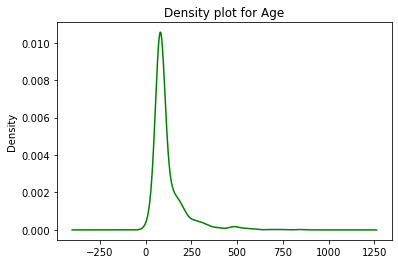

In [145]:
data.Insulin.plot.density(color='green')
plt.title('Density plot for Age')
plt.show()

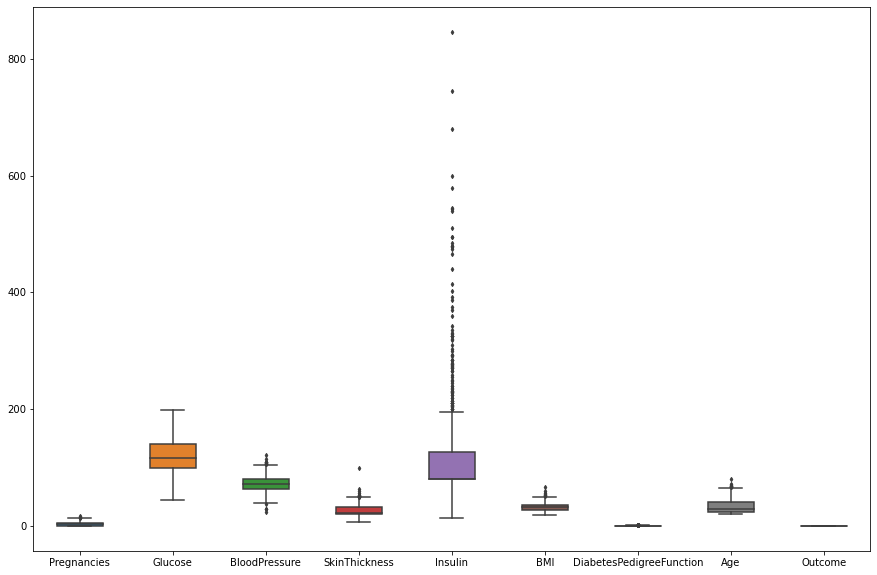

In [146]:

#now  outliers  turn 
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [147]:
# now we have to fix outliers according to  this whisker boxplot 

In [40]:
outlier = data['Pregnancies'].quantile(0.98)

data = data[data['Pregnancies']<outlier]

outlier = data['BMI'].quantile(0.99)
data = data[data['BMI']<outlier]

outlier = data['SkinThickness'].quantile(0.99)
data = data[data['SkinThickness']<outlier]

outlier = data['Insulin'].quantile(0.95)
data = data[data['Insulin']<outlier]

outlier = data['DiabetesPedigreeFunction'].quantile(0.99)

data = data[data['DiabetesPedigreeFunction']<outlier]

outlier = data['Age'].quantile(0.99)
# removing the top 1% data from Age column
data = data[data['Age']<outlier]

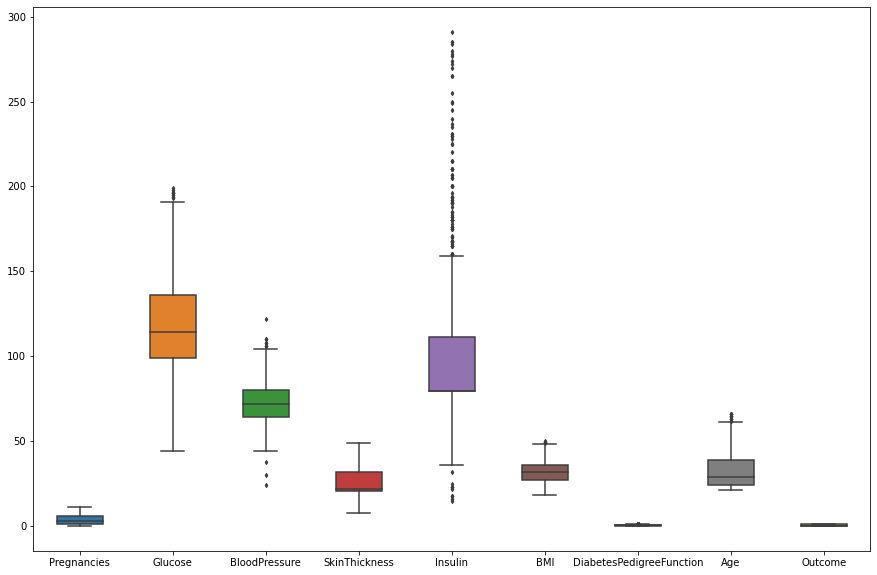

In [149]:
# removal of outliers 
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)
plt.show()

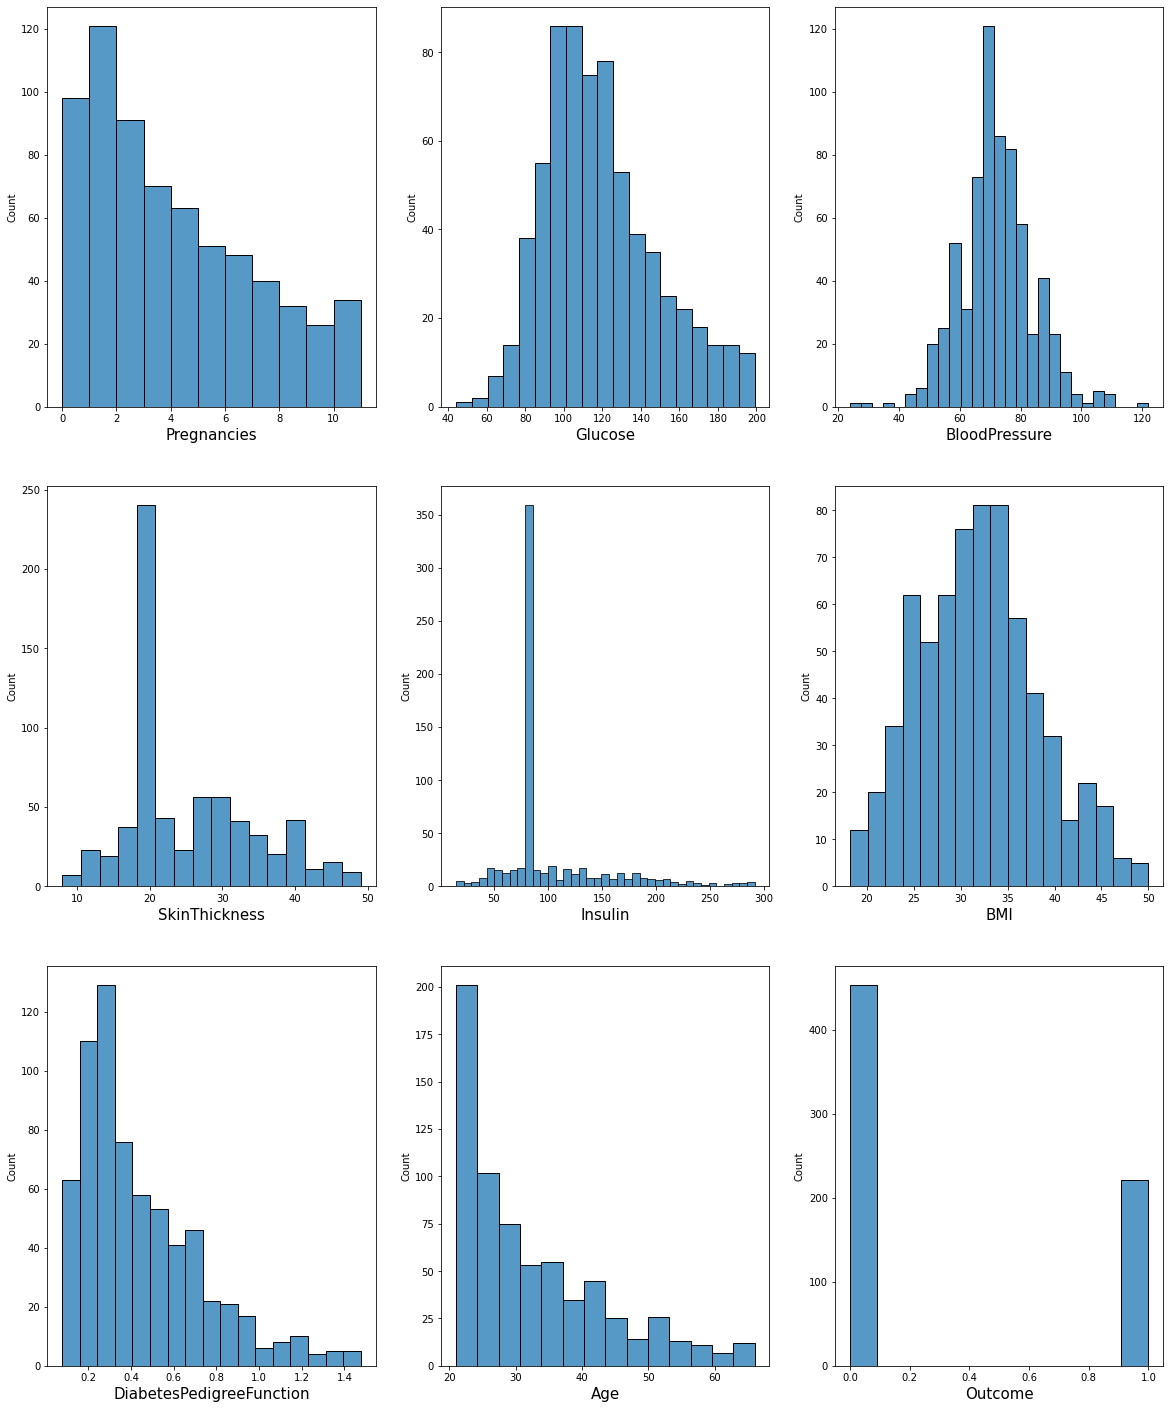

In [41]:
# now   checking the distribution in  the function 

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

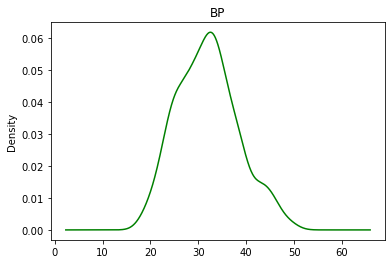

In [151]:
# now   checking after  the  removal of the outlieers ac to  the boxplot 
data.BMI.plot.density(color='green')
plt.title('BP')
plt.show()

In [42]:
data['Insulin'].min()

15.0

In [153]:
# now  the  whole  data is preprocessed  and  then  now  we to start the whole machine learning  algorithim 

In [43]:
X=data.drop(columns=['Outcome'])
Y=data['Outcome']

In [44]:
from sklearn.model_selection import train_test_split


In [45]:

X_train ,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

In [46]:
X_train

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
377            1   87.000000           60.0      37.000000   75.000000  37.2   
467            0   97.000000           64.0      36.000000  100.000000  36.8   
488            4   99.000000           72.0      17.000000   79.799479  25.6   
667           10  111.000000           70.0      27.000000   79.799479  27.5   
342            1  120.894531           68.0      35.000000   79.799479  32.0   
..           ...         ...            ...            ...         ...   ...   
11            10  168.000000           74.0      20.536458   79.799479  38.0   
416            1   97.000000           68.0      21.000000   79.799479  27.2   
221            2  158.000000           90.0      20.536458   79.799479  31.6   
720            4   83.000000           86.0      19.000000   79.799479  29.3   
639            1  100.000000           74.0      12.000000   46.000000  19.5   

     DiabetesPedigreeFunction  Age  
377                     0.509   22  
467                     0.600   25  
488                     0.294   28  
667                     0.141   40  
342                     0.389   22  
..                        ...  ...  
11                      0.537   34  
416                     1.095   22  
221                     0.805   66  
720                     0.317   34  
639                     0.149   28  

[471 rows x 8 columns]

In [69]:
#  now   as  we  have notices 

In [47]:
# now we have  to bring   consistency in the data  as every  feature has   different range   where from the above 
#  so  we are applying standard scalar 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(X_train, Y_train)

  Y_pred = lr.predict(X_test)  # now  testing  our model via   x  test 


lr_test = accuracy_score(Y_test,Y_pred)# number of right prediction/total number of prediction 

print(lr_test)

0.7832512315270936


In [49]:
# now   taking confusion matric 

confusion_matrix(Y_test,Y_pred)     
# TP -->107 FN-->10 
#FP-->26    TN -> 26

array([[129,  14],
       [ 30,  30]], dtype=int64)

In [167]:
print(classification_report(Y_test, Y_pred))

# Precision – Accuracy of positive predictions
#Precision=(TP/(TP+FP)) # how many are acttuallt positive out of predicated as positive
#REcall = (TP/ (FN+TP))  # how many are actullay positive out of real positive

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       143
           1       0.68      0.50      0.58        60

    accuracy                           0.78       203
   macro avg       0.75      0.70      0.72       203
weighted avg       0.77      0.78      0.77       203



In [50]:
# now  using   deceesion treee 


from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred = dtc.predict(X_test)

dt_test = accuracy_score(Y_test,Y_pred)

print(dt_test)

0.6995073891625616


In [51]:

confusion_matrix(Y_test, Y_pred)

array([[107,  36],
       [ 25,  35]], dtype=int64)

In [52]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       143
           1       0.49      0.58      0.53        60

    accuracy                           0.70       203
   macro avg       0.65      0.67      0.66       203
weighted avg       0.72      0.70      0.71       203



In [53]:
# now we are trying to use the hyper para meter  tunning 
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1),
}
#  cross validation of the the data  gives the best  example to use -alll the dataset to traning  data

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [78]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 9}


In [172]:
# now  using the decesion tree  with the mostt optimized parameter
dt_best_para = grid_search.best_estimator_
Y_pred = dt_best_para.predict(X_test)

dt_test = accuracy_score(Y_test,Y_pred)
print(dt_test)


0.7586206896551724


In [173]:
confusion_matrix(Y_test, Y_pred)

array([[122,  21],
       [ 28,  32]], dtype=int64)

In [174]:

print(classification_report(Y_test, Y_pred))  #  after increasng the accuracy

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       143
           1       0.60      0.53      0.57        60

    accuracy                           0.76       203
   macro avg       0.71      0.69      0.70       203
weighted avg       0.75      0.76      0.75       203



In [82]:
# now  applying stacking to the data set 

In [181]:
from sklearn.model_selection import train_test_split
#   to  hold the  the validation  data set in the whole
train, val_train, test, val_test = train_test_split(X, Y, test_size = 0.5, random_state = 355)

In [182]:
# let's split the training set again into training and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [175]:
lr = LogisticRegression()

lr.fit(X_train, Y_train)

LogisticRegression()

In [176]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(X_train, Y_train)

SVC()

In [177]:
# #  getting prediction on  validation
predict1 = lr.predict(val_train) # unseen data 
predict2 = svm.predict(val_train)

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
# now   inorder to pass to  the next feature  we have to combine  it into the   value 
predict_val = np.column_stack((predict1, predict2))

In [120]:
# now   come the  tune of the new  one

predict_test1 = lr.predict(X_test)
predict_test2 = svm.predict(X_test)  #predicted 

In [122]:

# now   comes the  stacked one 
predict_test = np.column_stack((predict_test1, predict_test2)) 
# for testing the accuracy 

In [118]:

# now  givinf the  data  to the base mmodel 
# predict val is  training data 
# val_test is the training  data set 
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val, val_test)  # train and test 

RandomForestClassifier()

In [185]:
# acuuracy
stacking_acc = accuracy_score(Y_test, rand_clf.predict(predict_test))  #  giving  the testing data  
print(stacking_acc)

0.8235294117647058


In [186]:
confusion_matrix(y_test, rand_clf.predict(predict_test))

array([[43,  5],
       [ 7, 13]], dtype=int64)

In [187]:

print(classification_report(y_test, rand_clf.predict(predict_test)))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        48
           1       0.72      0.65      0.68        20

    accuracy                           0.82        68
   macro avg       0.79      0.77      0.78        68
weighted avg       0.82      0.82      0.82        68



In [ ]:
# CONCLUSION IS USING  THE  STACKING IS  BEST  APPROACH 
#KNN --
#DECESION TREE-
#STACKING(M1-LR   M2--SVM  KERNEL)